In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import Ridge, Lasso # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore
import mlflow # type: ignore
import mlflow.sklearn # type: ignore


file_path = r"C:\Anurag\MLFLOW ASSIGNMENT\water_potability.csv" 
data = pd.read_csv(file_path)

print("Few rows of the dataset:")
print(data.head())

print("Names of columns in the dataset:")
print(data.columns)

target_column = 'Potability'

if target_column not in data.columns:
    
    raise ValueError(f"Column '{target_column}' not found in the dataset. Available columns: {data.columns}")

data = data.apply(pd.to_numeric, errors='coerce')

Few rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Names of columns in the dataset:
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon',

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


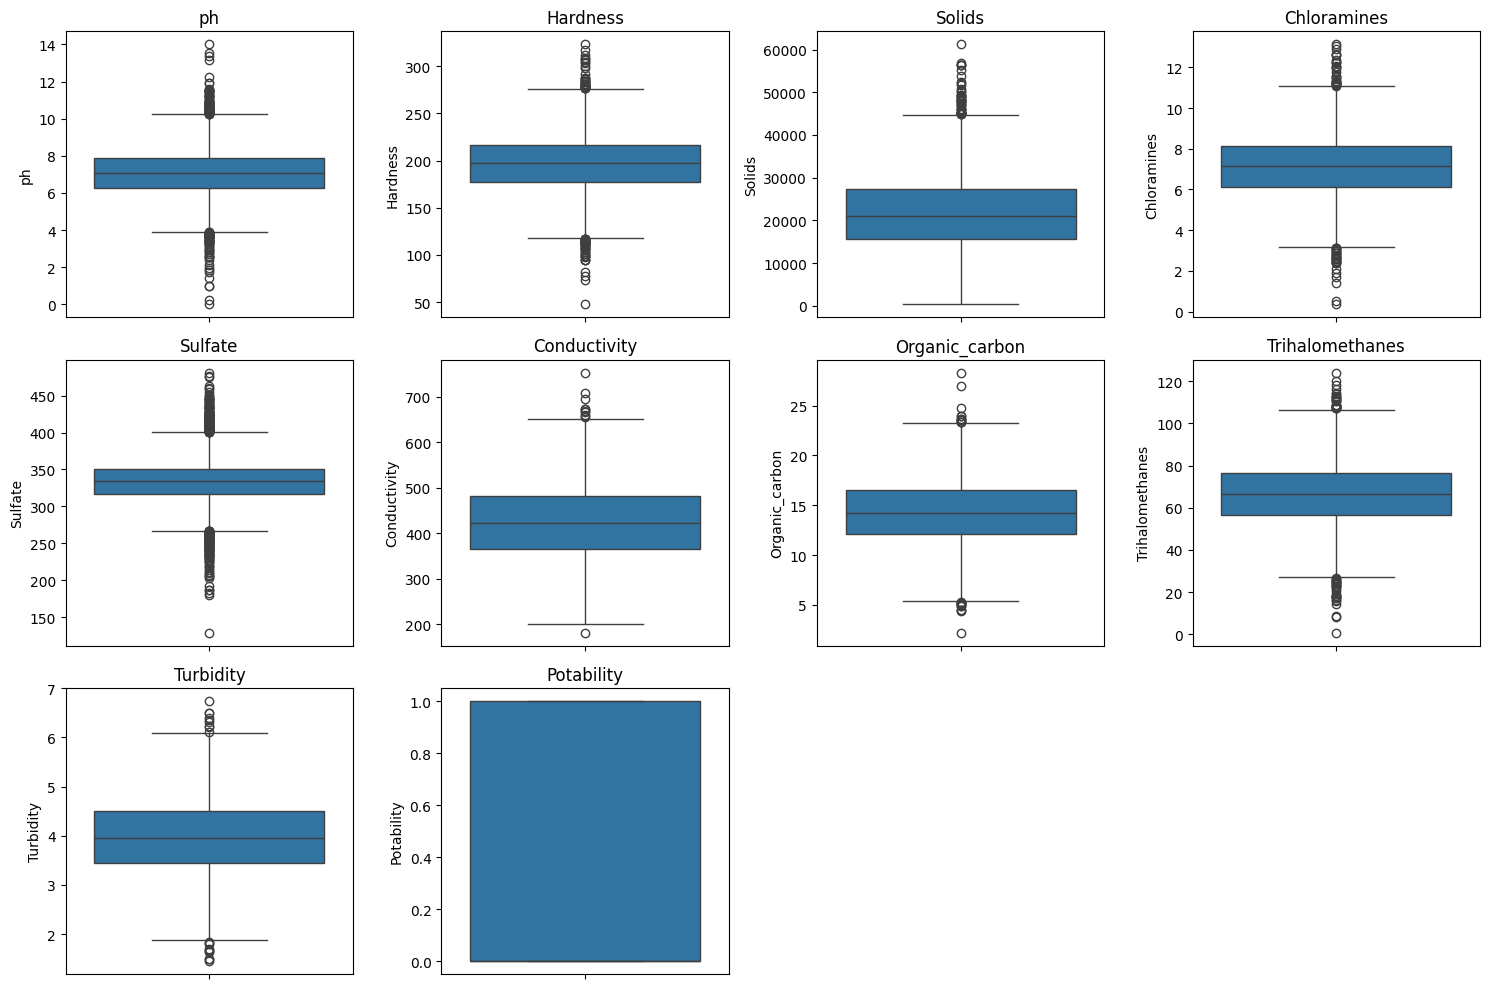

In [2]:
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2657.000000  2657.000000   2657.000000  2657.000000  2657.000000   
mean      7.077898   196.987221  21465.542889     7.111240   333.851905   
std       1.214608    28.266583   7873.882113     1.410896    26.263921   
min       3.902476   118.988579    320.942611     3.194969   268.646941   
25%       6.353437   178.998245  15613.160533     6.192193   319.737009   
50%       7.080795   197.517093  20574.364258     7.116809   333.775777   
75%       7.793834   215.648216  26730.192613     8.051538   347.930400   
max      10.252816   275.679780  44376.187382    10.999995   399.617217   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2657.000000     2657.000000      2657.000000  2657.000000  2657.000000  
mean     425.738024       14.326481        66.476449     3.962308     0.373730  
std       79.907395        3.224768        14.976547     0.761498     0.483884  


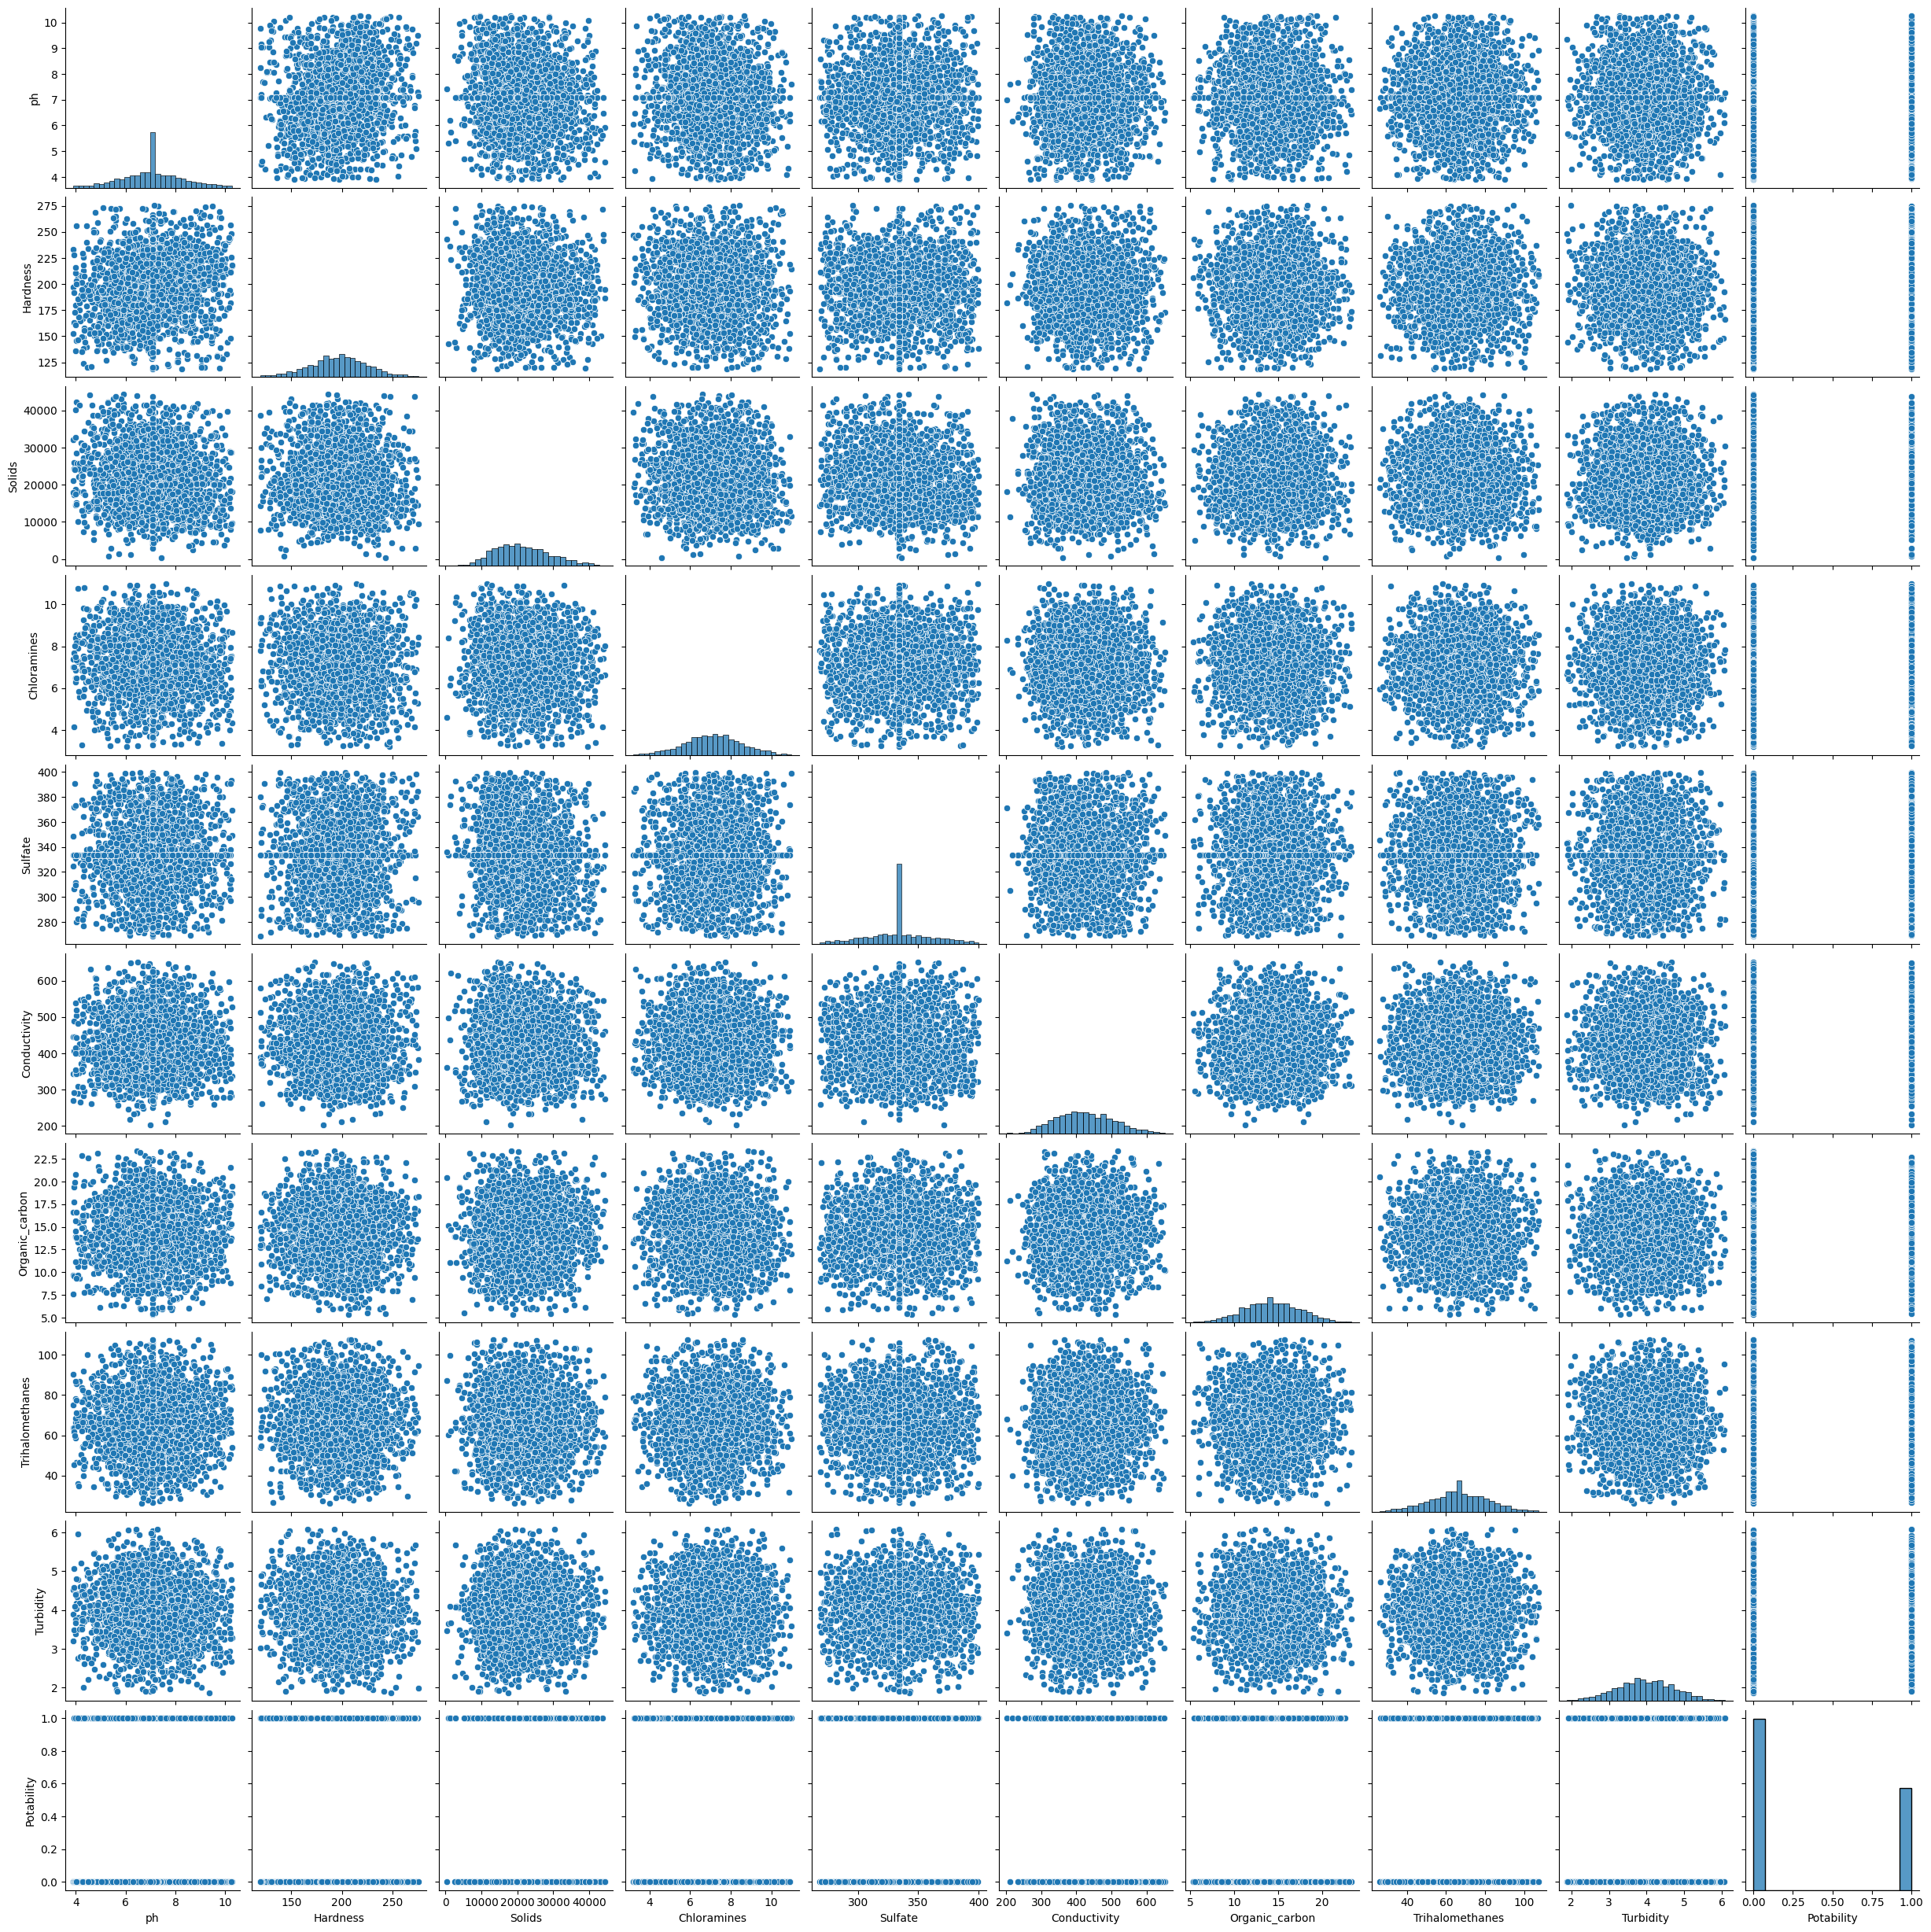

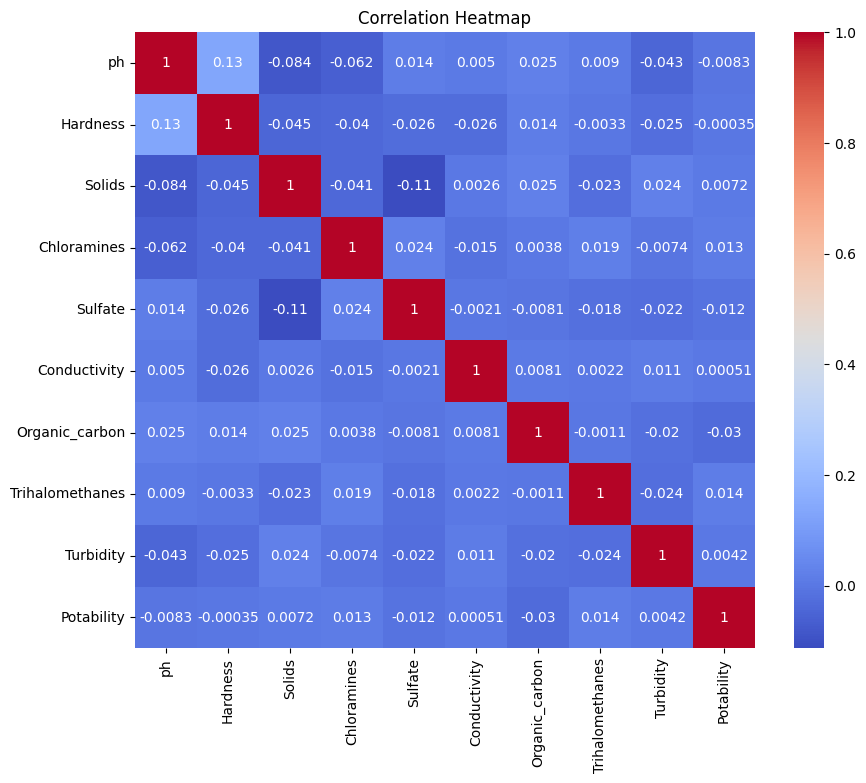

In [3]:
print(data.describe())

sns.pairplot(data)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
X = data.drop('Potability', axis=1)
y = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f'Ridge Regression - RMSE: {ridge_rmse}, R²: {ridge_r2}')
print(f'Lasso Regression - RMSE: {lasso_rmse}, R²: {lasso_r2}')

Ridge Regression - RMSE: 0.4777787485887081, R²: -0.008973720443359534
Lasso Regression - RMSE: 0.4769424656164269, R²: -0.005444684963993973


In [ ]:
mlflow.set_tracking_uri("http://localhost:5000")  # Change this to your MLflow tracking server URI
mlflow.set_experiment("Water Quality Regression")


with mlflow.start_run(run_name="Ridge Regression"):
    mlflow.log_param("alpha", 1.0)
    mlflow.log_metric("rmse", ridge_rmse)
    mlflow.log_metric("r2", ridge_r2)
    mlflow.sklearn.log_model(ridge, "model")


with mlflow.start_run(run_name="Lasso Regression"):
    mlflow.log_param("alpha", 1.0)
    mlflow.log_metric("rmse", lasso_rmse)
    mlflow.log_metric("r2", lasso_r2)
    mlflow.sklearn.log_model(lasso, "model")